<a href="https://colab.research.google.com/github/mmyckowiak/DataSciencePortfolio/blob/main/COVID19_Symptoms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 Symptoms Data Modeling

---


The objective of this project is to develop a model that utilizes independent symptoms—such as breathing problems, fever, dry cough, sore throat, runny nose, headaches, fatigue, and gastrointestinal issues—to predict whether a patient has been diagnosed with COVID-19. To achieve this, we train and test three different models: Decision Tree, Random Forest, and Boosting Tree. Given the inherent strengths of Random Forest and Boosting Tree, we anticipate these models to outperform the simpler Decision Tree.

Throughout the project, I will summarize each step, including visualization, pre-processing, splitting the data into training and testing sets, and feeding them into each model. Additionally, we use the feature_importances_ function to analyze the significance of each independent variable in predicting COVID-19 diagnoses for each model.

Importing the Necessary Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

---

In this section, we perform basic exploratory data analysis by utilizing the describe, info, and shape methods to assess the dataset's fundamental structure. Following this step, we will pre-process the dataset in preparation for creating visualizations.

In [5]:
data = pd.read_csv('/content/Covid-19_Symptoms.csv')
data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Headache,Fatigue,Gastrointestinal,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,Yes,Yes,Yes,No,No,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes


In [6]:
data.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Headache,Fatigue,Gastrointestinal,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2
top,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
freq,3620,4273,4307,3953,2952,2736,2821,2883,4383


The describe function above provides the count, number of unique values, top value, and frequency of the top value for each column. With a total of 5,434 rows in the dataset, each column should contain 5,434 values. Since the dataset consists entirely of Yes/No values, the number of unique values per column is expected to be 2, which is confirmed in the results.

The frequency row reveals that the most common symptoms are fever and dry cough, while the least common symptoms are headache and fatigue. A significant challenge in this project arises from the imbalance between positive and negative COVID-19 test results. The frequency of positive cases is 4,383, while negative cases amount to only 1,051. This imbalance in the dataset is a critical factor to consider when training each of the models.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Breathing Problem  5434 non-null   object
 1   Fever              5434 non-null   object
 2   Dry Cough          5434 non-null   object
 3   Sore throat        5434 non-null   object
 4   Running Nose       5434 non-null   object
 5   Headache           5434 non-null   object
 6   Fatigue            5434 non-null   object
 7   Gastrointestinal   5434 non-null   object
 8   COVID-19           5434 non-null   object
dtypes: object(9)
memory usage: 382.2+ KB


In [8]:
data.shape

(5434, 9)

# Data Pre-Processing

---

In this section, we use the LabelEncoder to convert Yes/No values into 1/0, respectively. Encoding these values is an essential step in pre-processing our data for modeling. If we were to input Yes/No values directly into the model, it would struggle to interpret the data correctly. Encoding transforms the data from an object data type to an integer data type, allowing the model to better understand numerical representations. This transition from objects to integers retains virtually all information, ensuring no significant data loss when inputting it into our models.

In [9]:
import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
objList = data.select_dtypes(include = "object").columns

for x in objList:
  data[x] = encoder.fit_transform(data[x])

print(data.dtypes)

Breathing Problem    int64
Fever                int64
Dry Cough            int64
Sore throat          int64
Running Nose         int64
Headache             int64
Fatigue              int64
Gastrointestinal     int64
COVID-19             int64
dtype: object


In [10]:
data

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Headache,Fatigue,Gastrointestinal,COVID-19
0,1,1,1,1,1,0,1,1,1
1,1,1,1,1,0,1,1,0,1
2,1,1,1,1,1,1,1,1,1
3,1,1,1,0,0,0,0,0,1
4,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...
5429,0,1,1,1,0,0,1,0,1
5430,0,0,1,0,1,0,1,0,1
5431,0,0,1,0,0,0,0,1,1
5432,0,0,1,1,1,1,0,1,1


# Data Visualization

---

<Axes: >

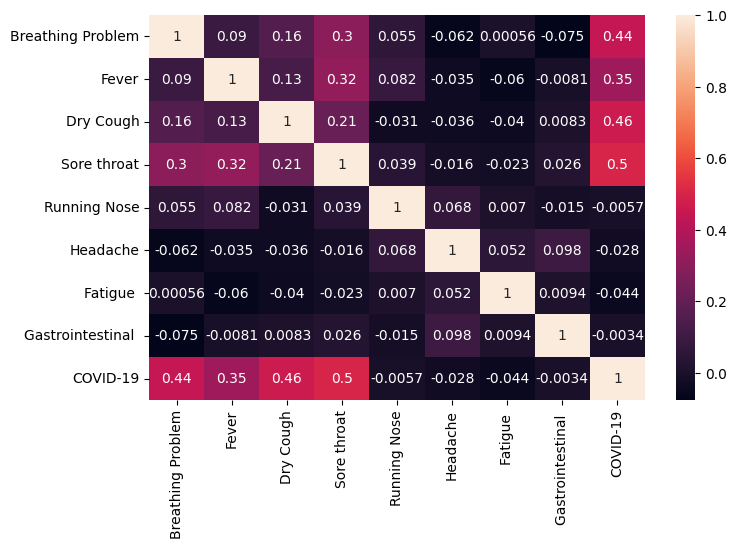

In [11]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(), annot=True)

The diagram above is a correlation matrix, which illustrates the relationships between our different variables. Focusing on the COVID-19 row, we observe that breathing problems, fever, dry cough, and sore throat are positively correlated with COVID-19. In contrast, runny nose, headache, fatigue, and gastrointestinal issues show little to no correlation with COVID-19.

However, this does not necessarily mean that excluding symptoms with low correlation will result in a more accurate model. In general, the more data we include, the more insights we can gain about the system, leading to better predictions of whether a patient has COVID-19. To further understand the importance of each symptom in predicting COVID-19 diagnoses, we will use the feature_importances_ function for each model.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Breathing Problem  5434 non-null   int64
 1   Fever              5434 non-null   int64
 2   Dry Cough          5434 non-null   int64
 3   Sore throat        5434 non-null   int64
 4   Running Nose       5434 non-null   int64
 5   Headache           5434 non-null   int64
 6   Fatigue            5434 non-null   int64
 7   Gastrointestinal   5434 non-null   int64
 8   COVID-19           5434 non-null   int64
dtypes: int64(9)
memory usage: 382.2 KB


<Figure size 1000x600 with 0 Axes>

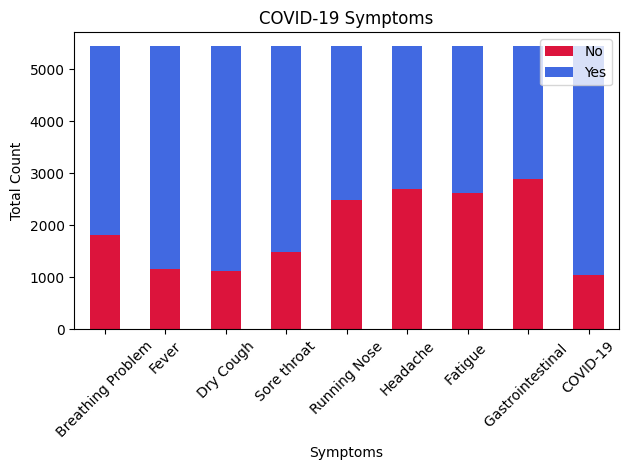

In [13]:
plt.figure(figsize=(10,6))
symptom_order = data.columns
counts = data.stack().groupby(level=[1]).value_counts().unstack()
counts.loc[symptom_order].plot.bar(rot =45, stacked=True, color = ["Crimson", "RoyalBlue"])
plt.legend(labels=["No", "Yes"], loc="upper right")
plt.title("COVID-19 Symptoms")
plt.xlabel("Symptoms")
plt.ylabel("Total Count")

plt.tight_layout()

Based on the graph above and as discussed in a previous section, there are significantly more positive COVID-19 cases than negative ones, resulting in an unbalanced dataset. If we were to train our models using this data, we risk producing models that achieve high accuracy but fail to provide meaningful analysis. Out of the 5,434 cases, 4,383 are positive for COVID-19, while 1,051 are negative, meaning that 80% of the data consists of positive cases.

In such a scenario, if the model consistently predicted all cases as positive, it would achieve an accuracy of 80%, which might initially seem satisfactory but would be misleading. This highlights the importance of addressing the dataset imbalance when splitting the data into training and testing sets. We want our model to genuinely analyze the data and distinguish between positive and negative cases. To avoid misleading accuracy results, I will carefully split the training and testing sets in a strategic manner.

# Creating the Train and Test Datasets

---

In this section, we create custom test and training datasets. Instead of using the train-test-split function, I opted to construct a balanced training dataset—consisting of an equal number of positive and negative COVID-19 cases—and an unbalanced testing dataset that mirrors the actual distribution of positive and negative COVID-19 cases.

In the cell below, nested conditional statements are utilized to achieve this split. The challenge with this approach lies in the resulting datasets: the training dataset will be significantly smaller than the testing dataset. This is unconventional, as models are typically trained on a larger dataset and tested on a smaller one. However, given the delicate nature of this situation, we will leverage confusion matrices to evaluate whether each model is genuinely performing meaningful analysis.

In [14]:
i = 0;
traindata = pd.DataFrame(columns=data.columns)
testdata = pd.DataFrame(columns=data.columns)
while i < data.shape[0] :
  if data.iloc[i, data.columns.get_loc('COVID-19')] == 1 :
    if traindata['COVID-19'].value_counts().get(1,0) < 500 :
     traindata = pd.concat([traindata, data.iloc[[i]]], ignore_index = True)
     i = i+1
    else :
      testdata = pd.concat([testdata, data.iloc[[i]]], ignore_index = True)
      i = i+1
  elif data.iloc[i, data.columns.get_loc('COVID-19')] == 0 :
    if traindata['COVID-19'].value_counts().get(0,0) < 500 :
      traindata = pd.concat([traindata, data.iloc[[i]]], ignore_index = True)
      i = i+1
    else :
      testdata = pd.concat([testdata, data.iloc[[i]]], ignore_index = True)
      i = i +1
  else :
    testdata = pd.concat([testdata, data.iloc[[i]]], ignore_index = True)
    i = i+1
traindata.shape, testdata.shape

((1000, 9), (4434, 9))

In [15]:
traindata.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Headache,Fatigue,Gastrointestinal,COVID-19
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,2,2,2,2,2,2,2,2,2
top,1,1,1,1,1,1,1,0,1
freq,751,713,654,572,603,506,593,574,500


Above, we check to see if our train dataset is balanced with an equal amount of positive and negative COVID-19 cases. As seen in the COVID-19 column, there are two unique values each with a frequency of 500 counts. This is what we were hoping to achieve, so we are good to proceed to our modeling portion.

In [16]:
testdata.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Headache,Fatigue,Gastrointestinal,COVID-19
count,4434,4434,4434,4434,4434,4434,4434,4434,4434
unique,2,2,2,2,2,2,2,2,2
top,1,1,1,1,1,1,1,0,1
freq,2869,3560,3653,3381,2349,2230,2228,2309,3883


In [31]:
testdata.info(), traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4434 entries, 0 to 4433
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Breathing Problem  4434 non-null   int64
 1   Fever              4434 non-null   int64
 2   Dry Cough          4434 non-null   int64
 3   Sore throat        4434 non-null   int64
 4   Running Nose       4434 non-null   int64
 5   Headache           4434 non-null   int64
 6   Fatigue            4434 non-null   int64
 7   Gastrointestinal   4434 non-null   int64
 8   COVID-19           4434 non-null   int64
dtypes: int64(9)
memory usage: 311.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Breathing Problem  1000 non-null   int64
 1   Fever              1000 non-null   int64
 2   Dry Cough          1000 non-null   int64
 3   Sore thr

(None, None)

In [32]:
testdata = testdata.astype(int)
traindata = traindata.astype(int)
testdata.dtypes, traindata.dtypes

(Breathing Problem    int64
 Fever                int64
 Dry Cough            int64
 Sore throat          int64
 Running Nose         int64
 Headache             int64
 Fatigue              int64
 Gastrointestinal     int64
 COVID-19             int64
 dtype: object,
 Breathing Problem    int64
 Fever                int64
 Dry Cough            int64
 Sore throat          int64
 Running Nose         int64
 Headache             int64
 Fatigue              int64
 Gastrointestinal     int64
 COVID-19             int64
 dtype: object)

Below, we use the shuffle function from sklearn to shuffle our data. Then, we split the testing and training datasets into x_train, y_train and x_test, y_test. Next, we are ready for data modeling.

In [19]:
from sklearn.utils import shuffle
testdata = shuffle(testdata).reset_index(drop=True)
traindata = shuffle(traindata).reset_index(drop=True)

x_train = traindata.drop('COVID-19', axis=1)
y_train = traindata['COVID-19']
x_test = testdata.drop('COVID-19', axis=1)
y_test = testdata['COVID-19']
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1000, 8), (1000,), (4434, 8), (4434,))

# Data Modeling: Decision Trees

---

In this section, we train a Decision Tree model and use the testing dataset to predict whether each patient has COVID-19. To assess the model's performance and determine if it performs meaningful analysis, we construct a confusion matrix.

The confusion matrix reveals that, out of the 4,434 cases in the testing dataset, the model predicted 2,744 cases as positive and 1,690 cases as negative. Of the 2,744 cases predicted as positive, 2,679 were actually positive, while 65 were negative. Similarly, of the 1,690 cases predicted as negative, 1,204 were actually positive, and only 486 were truly negative. This indicates that the model performs well in identifying positive COVID-19 cases but struggles with accurately predicting negative cases.

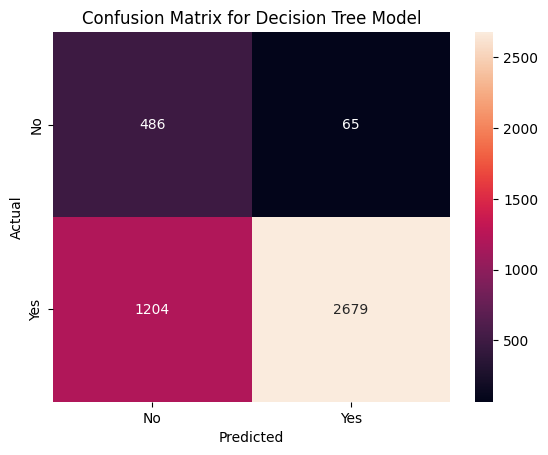

In [20]:
from sklearn.tree import DecisionTreeClassifier
alldecisiontree = DecisionTreeClassifier()
alldecisiontree.fit(x_train, y_train)

COVID_predict = alldecisiontree.predict(x_test)

from sklearn.metrics import confusion_matrix
alldes_conmatrix = confusion_matrix(y_test, COVID_predict)
sns.heatmap(alldes_conmatrix, annot=True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], fmt='.4g')
plt.title('Confusion Matrix for Decision Tree Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [61]:
from sklearn.metrics import classification_report
class_decision = pd.DataFrame(classification_report(y_test, COVID_predict, output_dict=True)).transpose()
class_decision

,precision,recall,f1-score,support
0,0.287574,0.882033,0.433735,551.000000
1,0.976312,0.689930,0.808511,3883.000000
accuracy,0.713802,0.713802,0.713802,0.713802
macro avg,0.631943,0.785982,0.621123,4434.000000
weighted avg,0.890725,0.713802,0.761938,4434.000000


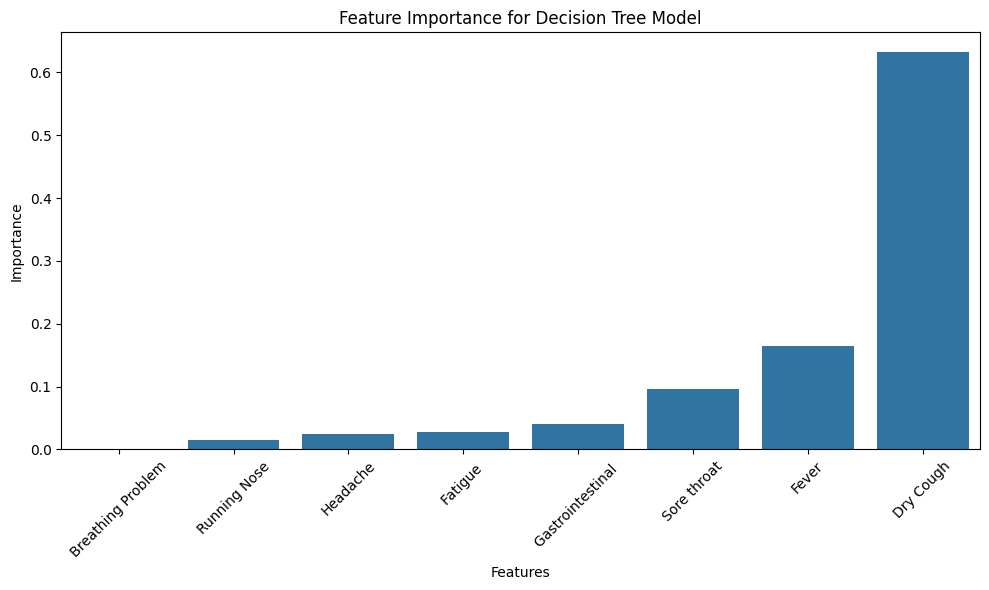

In [22]:
decisiontree_importance = alldecisiontree.feature_importances_
feature_importance_dt = pd.DataFrame({'Feature': x_train.columns, 'Importance' : decisiontree_importance})
feature_importance_dt = feature_importance_dt.sort_values(by='Importance')
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance_dt, x='Feature', y='Importance')
plt.title('Feature Importance for Decision Tree Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()

In the diagram above, we visualize the importance assigned by our Decision Tree model to each symptom. The results indicate that the model places greater importance on dry cough, fever, and sore throat when predicting whether a patient has COVID-19. Interestingly, the diagram reveals that the model assigns no importance to breathing problems, despite the fact that breathing problems were previously shown to have a positive correlation with COVID-19, along with dry cough, fever, and sore throat.

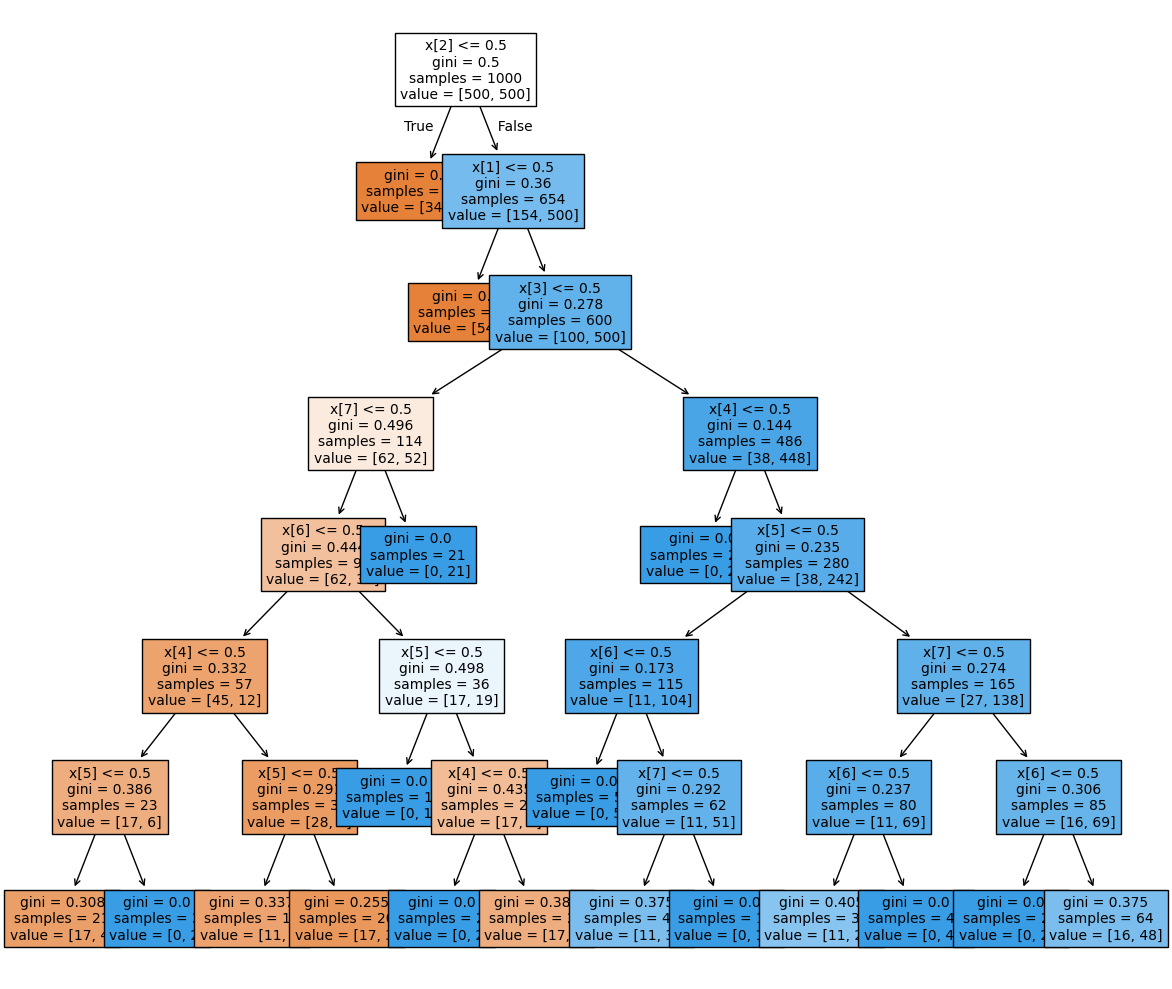

In [23]:
plt.figure(figsize=(12,10))
from sklearn.tree import plot_tree
plot_tree(alldecisiontree, filled=True, fontsize=10)
plt.tight_layout()

Above, we visualize our detailed Decision Tree model, which reinforces the significance of dry cough (x[2]), fever (x[1]), and sore throat (x[3]) in predicting COVID-19. These features are prominently highlighted as key determinants in the initial steps of the Decision Tree.

In [24]:
from sklearn.metrics import precision_score, recall_score

alldec_precision = precision_score(y_test, COVID_predict)
alldec_recall = recall_score(y_test, COVID_predict)
print(alldec_precision, alldec_recall)

0.9763119533527697 0.6899304661344321


# Data Modeling: Random Forests

---

In this section, we train a Random Forest model and use the testing dataset to predict whether each patient has COVID-19. As before, we evaluate the model's performance using a confusion matrix.

The confusion matrix for our Random Forest model is quite similar to that of the Decision Tree model, with slight differences. Out of the 4,434 cases, the Random Forest model predicts 2,676 cases as positive and 1,758 cases as negative. Among the 2,676 cases predicted as positive, 2,611 are truly positive, while 65 are negative. For the 1,758 cases predicted as negative, 1,272 are actually positive, and only 486 are truly negative. In this regard, the Random Forest model performs slightly worse than the Decision Tree model.

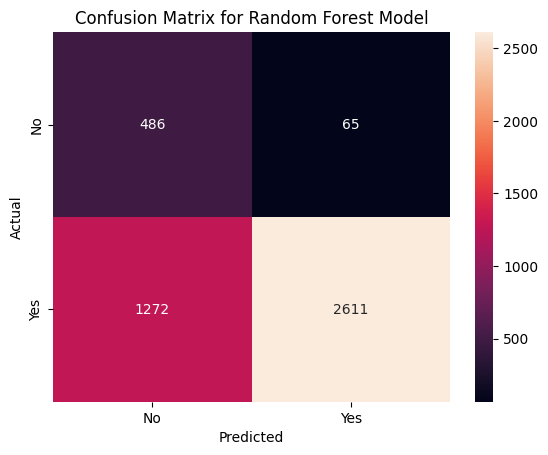

In [34]:
from sklearn.ensemble import RandomForestClassifier
allrandomforest = RandomForestClassifier()
allrandomforest.fit(x_train, y_train)

randompredict = allrandomforest.predict(x_test)

allran_conmatrix = confusion_matrix(y_test, randompredict)
sns.heatmap(allran_conmatrix, annot=True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], fmt='.4g')
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [38]:
from sklearn.metrics import classification_report
class_random = pd.DataFrame(classification_report(y_test, randompredict, output_dict=True)).transpose()
class_random

,precision,recall,f1-score,support
0,0.276451,0.882033,0.420961,551.000000
1,0.975710,0.672418,0.796158,3883.000000
accuracy,0.698466,0.698466,0.698466,0.698466
macro avg,0.626080,0.777225,0.608560,4434.000000
weighted avg,0.888815,0.698466,0.749533,4434.000000


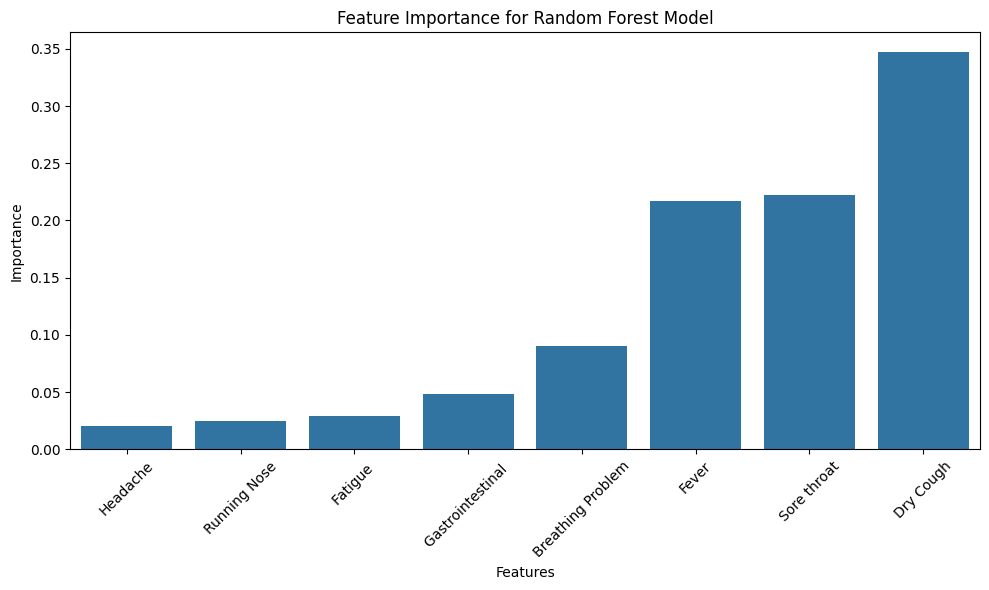

In [36]:
randomforest_importance = allrandomforest.feature_importances_
feature_importance_rf = pd.DataFrame({'Feature': x_train.columns, 'Importance' : randomforest_importance})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance')
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance_rf, x='Feature', y='Importance')
plt.title('Feature Importance for Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()

Above, we observe the importance scores assigned by our Random Forest model to each symptom. The results reveal that the model prioritizes dry cough, sore throat, and fever over all other symptoms. One notable distinction between the Random Forest and Decision Tree models is that the Random Forest assigns importance to every symptom, including breathing problems. This broader distribution of importance might contribute to the Random Forest model's slightly lower performance compared to the Decision Tree model.

# Data Modeling: Boosting Trees

---

In this section, we train a Boosting Tree model and use the testing dataset to predict whether each patient has COVID-19. As with previous models, we assess its performance using a confusion matrix.

The confusion matrix for the Boosting Tree model closely resembles those of the Decision Tree and Random Forest models, with slight differences. Out of the 4,434 cases, the Boosting Tree model predicts 2,778 cases as positive and 1,656 cases as negative. Of the 2,778 cases predicted as positive, 2,695 are truly positive, while 83 are actually negative. Similarly, of the 1,656 cases predicted as negative, 1,188 are truly positive, and only 468 are truly negative. This indicates that the Boosting Tree model excels at predicting positive COVID-19 cases but performs the poorest in identifying negative cases.

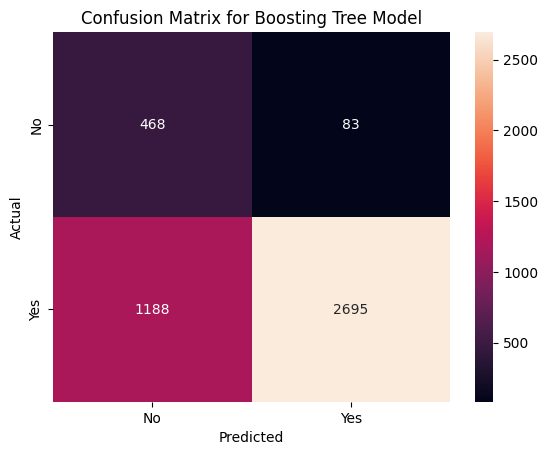

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
allboosting = GradientBoostingClassifier()
allboosting.fit(x_train, y_train)

boost_predict = allboosting.predict(x_test)

allboost_conmatrix = confusion_matrix(y_test, boost_predict)
sns.heatmap(allboost_conmatrix, annot=True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], fmt='.4g')
plt.title('Confusion Matrix for Boosting Tree Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [47]:
class_boost = pd.DataFrame(classification_report(y_test, boost_predict, output_dict=True)).transpose()
class_boost

,precision,recall,f1-score,support
0,0.282609,0.849365,0.424105,551.000000
1,0.970122,0.694051,0.809188,3883.000000
accuracy,0.713351,0.713351,0.713351,0.713351
macro avg,0.626366,0.771708,0.616646,4434.000000
weighted avg,0.884687,0.713351,0.761335,4434.000000


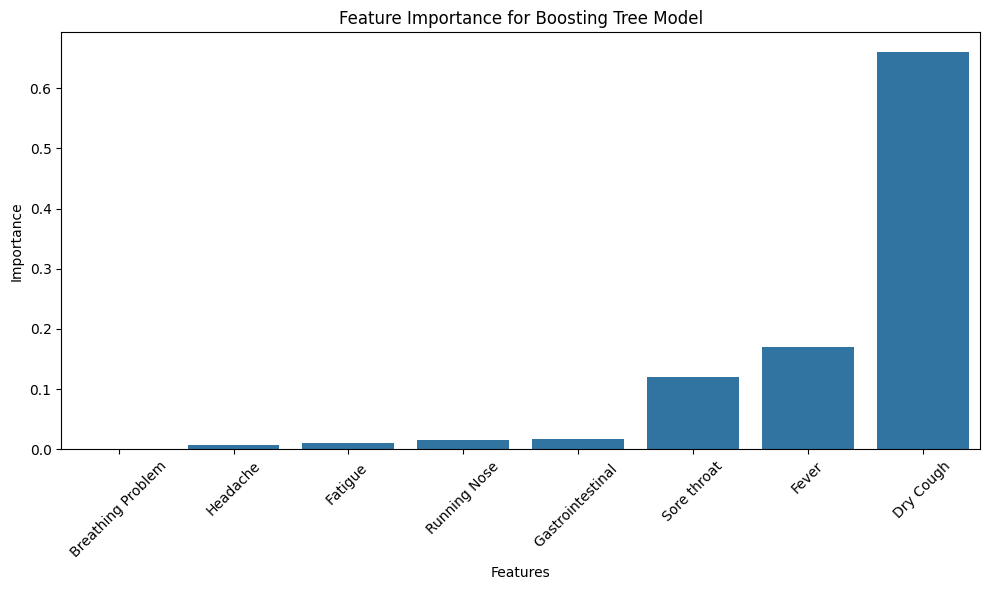

In [57]:
boosttree_importance = allboosting.feature_importances_
boosttree_importance = np.round(boosttree_importance, 6)
feature_importance_bt = pd.DataFrame({'Feature': x_train.columns, 'Importance' : boosttree_importance})
feature_importance_bt = feature_importance_bt.sort_values(by='Importance')
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance_bt, x='Feature', y='Importance')
plt.title('Feature Importance for Boosting Tree Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()

Above, we plot the importance scores assigned by the Boosting Tree model to each symptom. The results indicate that the model places the highest priority on dry cough, fever, and sore throat. Similar to the Decision Tree model, the Boosting Tree model assigns no importance to breathing problems while showing significant importance (approximately 0.6) to dry cough.

# Conclusion: Comparing our Decision Tree, Random Forest and Boosting Tree Models

---

In [58]:
comparing_importances = pd.DataFrame({'Decision Tree' : decisiontree_importance, 'Random Forest' : randomforest_importance, 'Boosting Tree' : boosttree_importance}, index=x_train.columns)
comparing_importances

,Decision Tree,Random Forest,Boosting Tree
Breathing Problem,0.000000,0.090328,0.000000
Fever,0.164396,0.217174,0.169458
Dry Cough,0.632013,0.347003,0.659654
Sore throat,0.095683,0.222157,0.119556
Running Nose,0.015716,0.025010,0.015741
Headache,0.024256,0.020693,0.008181
Fatigue,0.027230,0.029475,0.010012
Gastrointestinal,0.040705,0.048158,0.017399


In [59]:
class_boost

,precision,recall,f1-score,support
0,0.282609,0.849365,0.424105,551.000000
1,0.970122,0.694051,0.809188,3883.000000
accuracy,0.713351,0.713351,0.713351,0.713351
macro avg,0.626366,0.771708,0.616646,4434.000000
weighted avg,0.884687,0.713351,0.761335,4434.000000


In [60]:
class_random

,precision,recall,f1-score,support
0,0.276451,0.882033,0.420961,551.000000
1,0.975710,0.672418,0.796158,3883.000000
accuracy,0.698466,0.698466,0.698466,0.698466
macro avg,0.626080,0.777225,0.608560,4434.000000
weighted avg,0.888815,0.698466,0.749533,4434.000000


In [62]:
class_decision

,precision,recall,f1-score,support
0,0.287574,0.882033,0.433735,551.000000
1,0.976312,0.689930,0.808511,3883.000000
accuracy,0.713802,0.713802,0.713802,0.713802
macro avg,0.631943,0.785982,0.621123,4434.000000
weighted avg,0.890725,0.713802,0.761938,4434.000000


To come to a conclusion, we will use the f-1 score calculated from each model to assess overall model performance.

Decision Tree:
* Macro Avg f1-score = 0.621123
* Weighted Avg f1-score = 0.761938

Random Forest:
* Macro Avg f1-score = 0.608560
* Weighted Avg f1-score = 0.749533

Boosting Tree:
* Macro Avg f1-score = 0.616646
* Weighted Avg f1-score = 0.761335

In conclusion, the Decision Tree model has the highest f1-score for both the Macro Avg and Weighted Avg, making it the most accurate model in predicting COVID-19 outcomes.